<a href="https://colab.research.google.com/github/youngjinjae/pythontest/blob/main/0731_%EC%A6%9D%EC%8B%9D_%EA%B2%B0%EA%B3%BC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)


<function matplotlib.pyplot.show(close=None, block=None)>

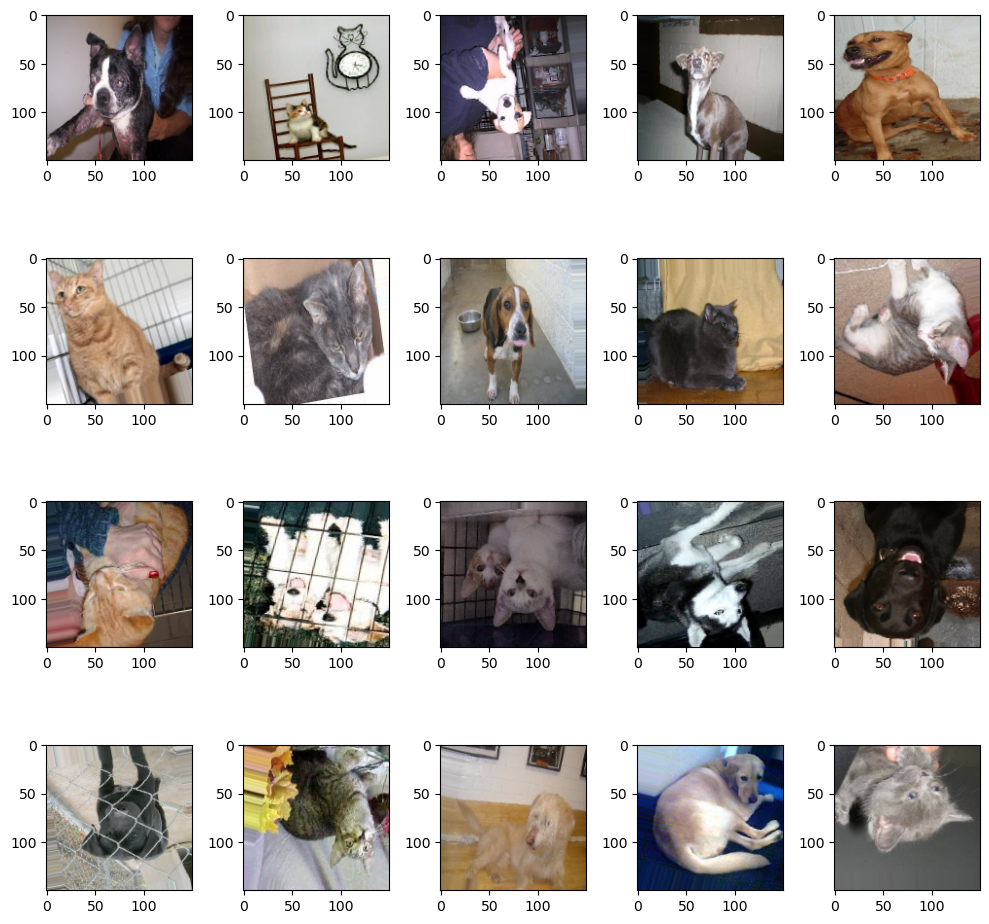

In [ ]:
# 경로 설정
train_dir = './data/cat_dog_small/train'
validation_dir = './data/cat_dog_small/validation'


# imagedatagenerator 생성 하자
# image file 읽어서 pixel 데이터를 추출 generator 2개 만들기
# 모든 이미지 데이터d의 pixel 값을 255 나누어서 scaling = > minmaxscaling
train_datagen=ImageDataGenerator(rescale=1/255,
                            rotation_range=20,
                             # 지정된 각도 범위내에서 임의로 원본이미지를 회전
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             # 지정된 방향 이동 범위내에서 임의로 원본이미지를 이동.
                             # 수치는 전체 넓이의 비율(실수)
                             shear_range=0.1,
                             # 밀림 강도 범위내에서 임의로 원본이미지를 변형.
                             # 수치는 시계반대방향으로 밀림 강도를 라디안으로 표시
                             zoom_range=0.1,
                             # 지정된 확대/축소 범위내에서 임의로 원본이미지를 확대/축소.
                             # "1-수치"부터 "1+수치"사이 범위로 확대/축소
                             horizontal_flip=True,
                             vertical_flip=True,
                             # 수평, 수직방향으로 뒤집기.
                             fill_mode='nearest')
validation_datagen=ImageDataGenerator(rescale=1/255,rotation_range=20,
                             # 지정된 각도 범위내에서 임의로 원본이미지를 회전
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             # 지정된 방향 이동 범위내에서 임의로 원본이미지를 이동.
                             # 수치는 전체 넓이의 비율(실수)
                             shear_range=0.1,
                             # 밀림 강도 범위내에서 임의로 원본이미지를 변형.
                             # 수치는 시계반대방향으로 밀림 강도를 라디안으로 표시
                             zoom_range=0.1,
                             # 지정된 확대/축소 범위내에서 임의로 원본이미지를 확대/축소.
                             # "1-수치"부터 "1+수치"사이 범위로 확대/축소
                             horizontal_flip=True,
                             vertical_flip=True,
                             # 수평, 수직방향으로 뒤집기.
                             fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir, # taget directory
    classes=['cats','dogs'],
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir, # taget directory
    classes=['cats','dogs'],
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

for x_data, t_data in train_generator:
    print(x_data.shape)
    print(t_data.shape)
    break;

# 이렇게 generator로 가져온 데이터가 정말 이미지 데이터인지 확인해봐야함
fig = plt.figure(figsize=(10,10))
axs=[]

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))
for x_data, t_data in train_generator:
    for idx, img_data in enumerate(x_data):
        axs[idx].imshow(img_data)
    break;
fig.tight_layout()
plt.show

In [ ]:
# imagedatagenerator 를 이용해서 특정 폴덜로 부터 이미지를 읽어서
# ndarray를 만들어주는 generator를 정의
# 이제모들 구현을 해보자

# model 구현
model = Sequential()

#feature extranction 부분(convolution, pooling 처리)
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same',
                 input_shape=(150,150,3))) #이미지 변환 same, v # szie () 필요 s 생각하고 숫자
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same',
                 input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same',
                 input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same',
                 input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same',
                 input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters=128,
#                  kernel_size=(3,3),
#                  activation='relu',
#                  padding='same',
#                  input_shape=(150,150,3)))

# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters=128,
#                  kernel_size=(3,3),
#                  activation='relu',
#                  padding='same',
#                  input_shape=(150,150,3)))

# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters=128,
#                  kernel_size=(3,3),
#                  activation='relu',
#                  padding='same',
#                  input_shape=(150,150,3)))

# model.add(MaxPooling2D(pool_size=(2,2)))


# fc layer 입력 넣으면 됨 4차원에 3, 2차원으로
model.add(Flatten()) # 역할 input 역할
# 일반적으로 이쯤에서 dropout 적용
model.add(Dropout(rate=0.5))
# hidden layer도 포함 시킬 수 있다.
model.add(Dense(256,
                 activation='relu'))

# output layer
model.add(Dense(1,activation='sigmoid')) # 2진 분류

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 18, 18, 128)     

In [ ]:
# model 설정
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# model 학습
model_result = model.fit(train_generator,
                         steps_per_epoch=100,
                         epochs=30,
                         verbose=1,
                         validation_data = validation_generator,
                         validation_steps=50)

Epoch 1/30
100/100 [==============================] - 36s 351ms/step - loss: 0.6928 - accuracy: 0.5205 - val_loss: 0.6919 - val_accuracy: 0.5010
Epoch 2/30
100/100 [==============================] - 40s 396ms/step - loss: 0.6908 - accuracy: 0.5250 - val_loss: 0.6851 - val_accuracy: 0.5090
Epoch 3/30
100/100 [==============================] - 39s 385ms/step - loss: 0.6865 - accuracy: 0.5385 - val_loss: 0.6711 - val_accuracy: 0.5980
Epoch 4/30
100/100 [==============================] - 39s 384ms/step - loss: 0.6719 - accuracy: 0.5860 - val_loss: 0.6501 - val_accuracy: 0.6130
Epoch 5/30
100/100 [==============================] - 39s 385ms/step - loss: 0.6482 - accuracy: 0.6130 - val_loss: 0.6378 - val_accuracy: 0.6370
Epoch 6/30
100/100 [==============================] - 39s 386ms/step - loss: 0.6213 - accuracy: 0.6465 - val_loss: 0.6121 - val_accuracy: 0.6620
Epoch 7/30
100/100 [==============================] - 41s 406ms/step - loss: 0.6106 - accuracy: 0.6575 - val_loss: 0.5983 - val_ac

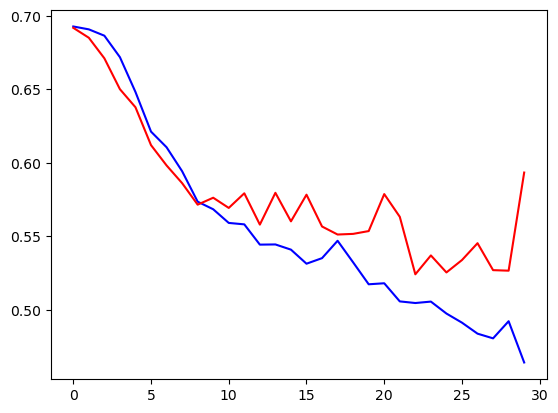

In [ ]:
# history 객체의 내용을 그래프로 표현
plt.plot(model_result.history['loss'],color='b')
plt.plot(model_result.history['val_loss'],color='r')

plt.show()